# Wines Points prediction 

In [1]:
%load_ext autoreload
%autoreload 2
import sys; sys.path.append('../')

Here we will try to predict the points a wine will get based on known characteristics (i.e. features, in the ML terminology). The mine point in this stage is to establish a simple, ideally super cost effective, basline.
In the real world there is a tradeoff between complexity and perforamnce, and the DS job, among others, is to present a tradeoff tables of what performance is achivalbel at what complexity level. 

to which models with increased complexity and resource demands will be compared. Complexity should then be translated into cost. For example:
 * Compute cost 
 * Maintenance cost
 * Serving costs (i.e. is new platform needed?) 
 

## Loading the data

In [2]:
import pandas as pd
#import cufflinks as cf; cf.go_offline()

In [3]:
wine_reviews = pd.read_csv("C:\\Users\\eranb\Python_ML_2023\\data\\winemag-data-130k-v2.csv")
wine_reviews.shape


(129971, 14)

In [64]:
#wine_reviews.head()

In [8]:
wine_reviews1=wine_reviews.drop(['Unnamed: 0','taster_twitter_handle','title','region_1','region_2'], axis=1)


In [69]:
#wine_reviews1.points.value_counts().sort_index()

In [9]:
wine_reviews1.dropna(subset=['price'], inplace=True)
wine_reviews1.dropna(subset=['designation'], inplace=True)
wine_reviews1.dropna(subset=['province'], inplace=True)
wine_reviews1.dropna(subset=['variety'], inplace=True)
wine_reviews1.head()

,country,description,designation,points,price,province,taster_name,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Roger Voss,Portuguese Red,Quinta dos Avidagos
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Alexander Peartree,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Paul Gregutt,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Michael Schachner,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Kerin O’Keefe,Frappato,Terre di Giurfo


In [111]:
#no na taster 
wine_reviews11=wine_reviews1.dropna(subset=['taster_name'])

wine_reviews11.shape


(69919, 10)

In [112]:
wine_reviews11.isna().sum()

Unnamed: 0     0
country        0
description    0
designation    0
points         0
price          0
province       0
taster_name    0
variety        0
winery         0
dtype: int64

In [ ]:
#import pandas as pd
#import matplotlib.pyplot as plt

# Assuming the DataFrame is already loaded and named wine_reviews1

# Calculate the average points for each taster
#average_points = wine_reviews1.groupby('taster_name')['points'].mean()

# Create the graph
#plt.figure(figsize=(10, 6))
#average_points.plot(kind='bar')
#plt.xlabel('Taster Name')
#plt.ylabel('Average Points')
#plt.title('Average Points by Taster')
#plt.xticks(rotation=45)
#plt.ylim(80, 100)
#plt.show()

In [113]:
wine_reviews11.sample(5)

,Unnamed: 0,country,description,designation,points,price,province,taster_name,variety,winery
75870,75870,South Africa,"A ripe but lively wine, from this master of Ch...",Bon Vallon,90,12.0,Robertson,Roger Voss,Chardonnay,De Wetshof
127519,127519,US,"This is a creamy, lushly textured white that's...",Block 21,90,30.0,California,Virginie Boone,Sauvignon Blanc,Kelleher
111060,111060,Argentina,"Opens with berry fruit aromas, density and sli...",Andean Culture,87,13.0,Mendoza Province,Michael Schachner,Malbec,Maipe
106105,106105,US,Zesty orange rind and apple notes take center ...,Unoaked,87,17.0,New York,Anna Lee C. Iijima,Chardonnay,Millbrook
84774,84774,US,This is a kitchen sink-style blend of 11 diffe...,Firehouse,89,18.0,Washington,Sean P. Sullivan,Red Blend,Tamarack Cellars


In [7]:
wine_reviews111=wine_reviews11.drop(['Unnamed: 0'], axis=1)

In [10]:
#wine_reviews111.sample(3)

In [39]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [41]:
import pydot
from tensorflow.keras.utils import plot_model

In [121]:
#plot_model(model, show_dtype=True, show_shapes=True, show_layer_names=True, to_file='model_1.png')

In [ ]:
########################################################################
#שלישי





In [116]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

data = wine_reviews11

df = data[['description', 'winery', 'points']]
df = df.dropna()

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

tokenizer_desc = Tokenizer()
tokenizer_desc.fit_on_texts(train_df['description'])
train_sequences_desc = tokenizer_desc.texts_to_sequences(train_df['description'])
test_sequences_desc = tokenizer_desc.texts_to_sequences(test_df['description'])

tokenizer_winery = Tokenizer()
tokenizer_winery.fit_on_texts(train_df['winery'])
train_sequences_winery = tokenizer_winery.texts_to_sequences(train_df['winery'])
test_sequences_winery = tokenizer_winery.texts_to_sequences(test_df['winery'])


max_len_desc = 100  
max_len_winery = 20  
train_data_desc = pad_sequences(train_sequences_desc, maxlen=max_len_desc)
test_data_desc = pad_sequences(test_sequences_desc, maxlen=max_len_desc)

train_data_winery = pad_sequences(train_sequences_winery, maxlen=max_len_winery)
test_data_winery = pad_sequences(test_sequences_winery, maxlen=max_len_winery)

max_points = df['points'].max()
train_labels = train_df['points'] / max_points
test_labels = test_df['points'] / max_points


input_desc = tf.keras.Input(shape=(max_len_desc,))
embedding_desc = tf.keras.layers.Embedding(len(tokenizer_desc.word_index) + 1, 50)(input_desc)
lstm_desc = tf.keras.layers.LSTM(64)(embedding_desc)

input_winery = tf.keras.Input(shape=(max_len_winery,))
embedding_winery = tf.keras.layers.Embedding(len(tokenizer_winery.word_index) + 1, 10)(input_winery)
lstm_winery = tf.keras.layers.LSTM(16)(embedding_winery)

concat = tf.keras.layers.Concatenate()([lstm_desc, lstm_winery])
dense1 = tf.keras.layers.Dense(64, activation='relu')(concat)
output = tf.keras.layers.Dense(1, activation='linear')(dense1)

model = tf.keras.Model(inputs=[input_desc, input_winery], outputs=output)


In [117]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit([train_data_desc, train_data_winery], train_labels, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
1399/1399 [==============================] - 49s 33ms/step - loss: 0.0056 - val_loss: 3.2771e-04
Epoch 2/10
1399/1399 [==============================] - 48s 35ms/step - loss: 2.5321e-04 - val_loss: 3.6987e-04
Epoch 3/10
1399/1399 [==============================] - 43s 31ms/step - loss: 1.9911e-04 - val_loss: 2.5792e-04
Epoch 4/10
1399/1399 [==============================] - 41s 29ms/step - loss: 1.7680e-04 - val_loss: 2.8251e-04
Epoch 5/10
1399/1399 [==============================] - 41s 29ms/step - loss: 1.6242e-04 - val_loss: 2.6824e-04
Epoch 6/10
1399/1399 [==============================] - 41s 29ms/step - loss: 1.3975e-04 - val_loss: 2.8391e-04
Epoch 7/10
1399/1399 [==============================] - 42s 30ms/step - loss: 1.2674e-04 - val_loss: 2.7119e-04
Epoch 8/10
1399/1399 [==============================] - 41s 29ms/step - loss: 1.1210e-04 - val_loss: 3.4367e-04
Epoch 9/10
1399/1399 [==============================] - 42s 30ms/step - loss: 1.0182e-04 - val_loss: 2.8610e

437/437 [==============================] - 4s 8ms/step


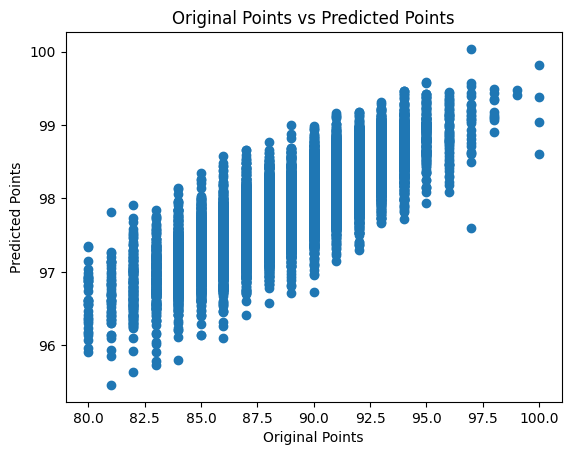

In [118]:
import matplotlib.pyplot as plt


original_points_range = (df['points'].min(), df['points'].max())
predicted_points_range = (train_labels.min() * max_points, train_labels.max() * max_points)

predicted_labels = model.predict([test_data_desc, test_data_winery]) * (original_points_range[1] - original_points_range[0]) + original_points_range[0]

plt.scatter(test_df['points'], predicted_labels)
plt.xlabel('Original Points')
plt.ylabel('Predicted Points')
plt.title('Original Points vs Predicted Points')
plt.show()

In [86]:
wine_reviews111.points

1         87
3         87
4         87
5         87
6         87
          ..
129963    90
129965    90
129966    90
129968    90
129970    90
Name: points, Length: 69919, dtype: int64

In [119]:
import numpy as np

# Make predictions on the test data
predictions = model.predict([test_data_desc, test_data_winery])

# Scale the predicted points back to the original range
predicted_points = predictions * max_points

# Create a table of predicted vs original points
comparison_table = pd.DataFrame({'Original Points': test_df['points'], 'Predicted Points': np.squeeze(predicted_points)})

# Display the table
print(comparison_table)

437/437 [==============================] - 4s 8ms/step
       Original Points  Predicted Points
75907               91         91.316231
53832               84         85.716728
3814                88         88.188820
56984               91         94.311317
11971               85         86.936111
...                ...               ...
1438                92         90.661034
84969               86         87.570961
85759               90         91.090416
91852               95         94.403152
62780               93         92.304619

[13984 rows x 2 columns]


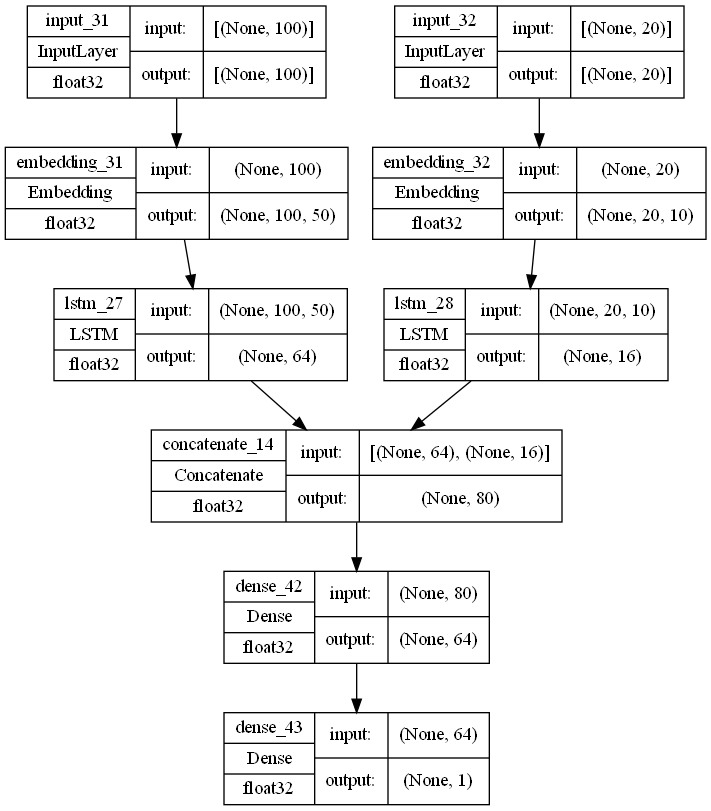

In [122]:
plot_model(model, show_dtype=True, show_shapes=True, show_layer_names=True, to_file='model_1.png')

In [123]:

loss = model.evaluate([test_data_desc, test_data_winery], test_labels)
print('Test Loss:', loss)

437/437 [==============================] - 4s 9ms/step - loss: 2.9435e-04
Test Loss: 0.00029435480246320367


In [124]:
predictions = model.predict([test_data_desc, test_data_winery])

predicted_points = predictions * max_points

results_df = pd.DataFrame({'Predicted Points': predicted_points.flatten(), 'Actual Points': test_df['points']})

print(results_df)

437/437 [==============================] - 4s 8ms/step
       Predicted Points  Actual Points
75907         91.316231             91
53832         85.716728             84
3814          88.188820             88
56984         94.311317             91
11971         86.936111             85
...                 ...            ...
1438          90.661034             92
84969         87.570961             86
85759         91.090416             90
91852         94.403152             95
62780         92.304619             93

[13984 rows x 2 columns]


In [ ]:
#######################רביעי

In [53]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

data = wine_reviews11
df = data[['description', 'winery', 'points']]
df = df.dropna()

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
tokenizer_desc = Tokenizer()
tokenizer_desc.fit_on_texts(train_df['description'])
train_sequences_desc = tokenizer_desc.texts_to_sequences(train_df['description'])
test_sequences_desc = tokenizer_desc.texts_to_sequences(test_df['description'])

tokenizer_winery = Tokenizer()
tokenizer_winery.fit_on_texts(train_df['winery'])
train_sequences_winery = tokenizer_winery.texts_to_sequences(train_df['winery'])
test_sequences_winery = tokenizer_winery.texts_to_sequences(test_df['winery'])

max_len_desc = 200  
max_len_winery = 30  
train_data_desc = pad_sequences(train_sequences_desc, maxlen=max_len_desc)
test_data_desc = pad_sequences(test_sequences_desc, maxlen=max_len_desc)

train_data_winery = pad_sequences(train_sequences_winery, maxlen=max_len_winery)
test_data_winery = pad_sequences(test_sequences_winery, maxlen=max_len_winery)

max_points = df['points'].max()
train_labels = train_df['points'] / max_points
test_labels = test_df['points'] / max_points





In [54]:
input_desc = tf.keras.Input(shape=(max_len_desc,))
embedding_desc = tf.keras.layers.Embedding(len(tokenizer_desc.word_index) + 1, 100)(input_desc) 
lstm_desc = tf.keras.layers.LSTM(128)(embedding_desc)  
input_winery = tf.keras.Input(shape=(max_len_winery,))
embedding_winery = tf.keras.layers.Embedding(len(tokenizer_winery.word_index) + 1, 20)(input_winery)  
lstm_winery = tf.keras.layers.LSTM(32)(embedding_winery)  
concat = tf.keras.layers.Concatenate()([lstm_desc, lstm_winery])
dense1 = tf.keras.layers.Dense(128, activation='relu')(concat)  
output = tf.keras.layers.Dense(1, activation='linear')(dense1)

model = tf.keras.Model(inputs=[input_desc, input_winery], outputs=output)


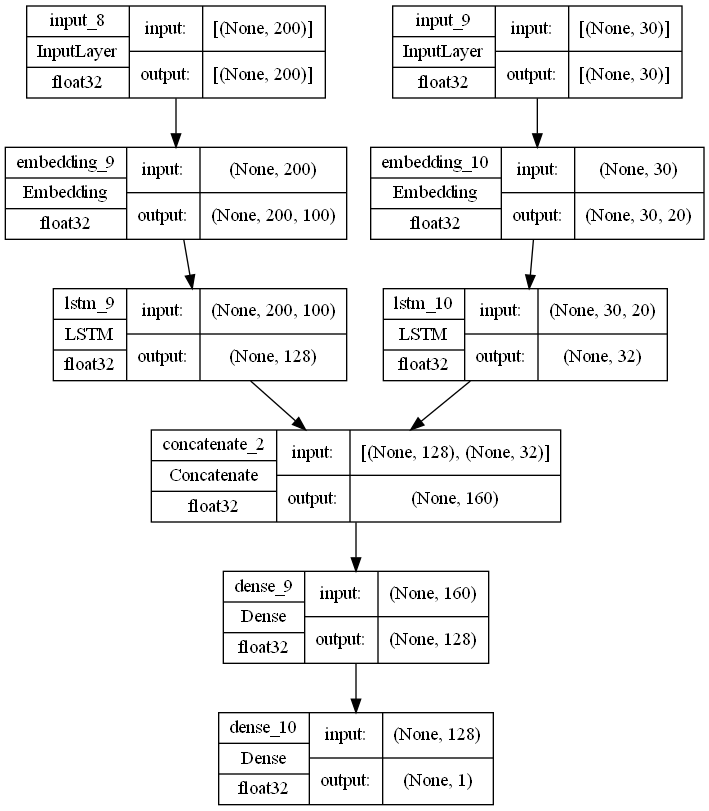

In [55]:
plot_model(model, show_dtype=True, show_shapes=True, show_layer_names=True, to_file='model_1.png')

In [56]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit([train_data_desc, train_data_winery], train_labels, batch_size=64, epochs=15, validation_split=0.2)

Epoch 1/15
700/700 [==============================] - 203s 287ms/step - loss: 0.0071 - val_loss: 3.4298e-04
Epoch 2/15
700/700 [==============================] - 172s 246ms/step - loss: 2.3783e-04 - val_loss: 2.8411e-04
Epoch 3/15
700/700 [==============================] - 175s 249ms/step - loss: 1.9100e-04 - val_loss: 3.7514e-04
Epoch 4/15
700/700 [==============================] - 177s 253ms/step - loss: 1.6793e-04 - val_loss: 2.7674e-04
Epoch 5/15
700/700 [==============================] - 176s 252ms/step - loss: 1.5153e-04 - val_loss: 2.7544e-04
Epoch 6/15
700/700 [==============================] - 185s 264ms/step - loss: 1.4116e-04 - val_loss: 2.7444e-04
Epoch 7/15
700/700 [==============================] - 184s 262ms/step - loss: 1.3526e-04 - val_loss: 2.7005e-04
Epoch 8/15
700/700 [==============================] - 182s 261ms/step - loss: 1.1685e-04 - val_loss: 4.5106e-04
Epoch 9/15
700/700 [==============================] - 188s 268ms/step - loss: 1.2171e-04 - val_loss: 2.7410e

In [57]:
loss = model.evaluate([test_data_desc, test_data_winery], test_labels)
print('Test Loss:', loss)

437/437 [==============================] - 14s 32ms/step - loss: 2.8872e-04
Test Loss: 0.0002887157606892288


In [58]:
0.0002687729138415307<0.0002887157606892288

True

In [ ]:
##################################with price#########################data = wine_reviews11

In [130]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

data = wine_reviews11

tokenizer_desc = Tokenizer()
tokenizer_desc.fit_on_texts(data['description'])
sequences_desc = tokenizer_desc.texts_to_sequences(data['description'])
max_len_desc = max([len(seq) for seq in sequences_desc])
desc_data = pad_sequences(sequences_desc, maxlen=max_len_desc)

tokenizer_winery = Tokenizer()
tokenizer_winery.fit_on_texts(data['winery'])
sequences_winery = tokenizer_winery.texts_to_sequences(data['winery'])
max_len_winery = max([len(seq) for seq in sequences_winery])
winery_data = pad_sequences(sequences_winery, maxlen=max_len_winery)

points_data = data['points'].values.reshape(-1, 1)
price_data = data['price'].values.reshape(-1, 1)

# Define the model architecture
input_desc = tf.keras.Input(shape=(max_len_desc,))
embedding_desc = tf.keras.layers.Embedding(len(tokenizer_desc.word_index) + 1, 50)(input_desc)
lstm_desc = tf.keras.layers.LSTM(64)(embedding_desc)

input_winery = tf.keras.Input(shape=(max_len_winery,))
embedding_winery = tf.keras.layers.Embedding(len(tokenizer_winery.word_index) + 1, 10)(input_winery)
lstm_winery = tf.keras.layers.LSTM(16)(embedding_winery)

input_price = tf.keras.Input(shape=(1,))
concat = tf.keras.layers.Concatenate()([lstm_desc, lstm_winery, input_price])
dense1 = tf.keras.layers.Dense(64, activation='relu')(concat)
output = tf.keras.layers.Dense(1, activation='linear')(dense1)

model = tf.keras.Model(inputs=[input_desc, input_winery, input_price], outputs=output)

model.compile(optimizer='adam', loss='mse')
model.fit([desc_data, winery_data, price_data], points_data, epochs=10, batch_size=32)



Epoch 1/10
2185/2185 [==============================] - 75s 33ms/step - loss: 254.0915
Epoch 2/10
2185/2185 [==============================] - 73s 34ms/step - loss: 4.1133
Epoch 3/10
2185/2185 [==============================] - 74s 34ms/step - loss: 2.3978
Epoch 4/10
2185/2185 [==============================] - 76s 35ms/step - loss: 1.7846
Epoch 5/10
2185/2185 [==============================] - 76s 35ms/step - loss: 1.5377
Epoch 6/10
2185/2185 [==============================] - 76s 35ms/step - loss: 1.4313
Epoch 7/10
2185/2185 [==============================] - 77s 35ms/step - loss: 1.3720
Epoch 8/10
2185/2185 [==============================] - 75s 34ms/step - loss: 1.2530
Epoch 9/10
2185/2185 [==============================] - 77s 35ms/step - loss: 1.1816
Epoch 10/10
2185/2185 [==============================] - 76s 35ms/step - loss: 1.1184


In [134]:

predicted_points = model.predict([desc_data, winery_data, price_data])


comparison = pd.DataFrame({'Original Points': points_data.flatten(), 'Predicted Points': predicted_points.flatten()})
print(comparison.head())

2185/2185 [==============================] - 23s 10ms/step
   Original Points  Predicted Points
0               87         87.684212
1               87         86.339928
2               87         85.268089
3               87         86.643509
4               87         86.767845


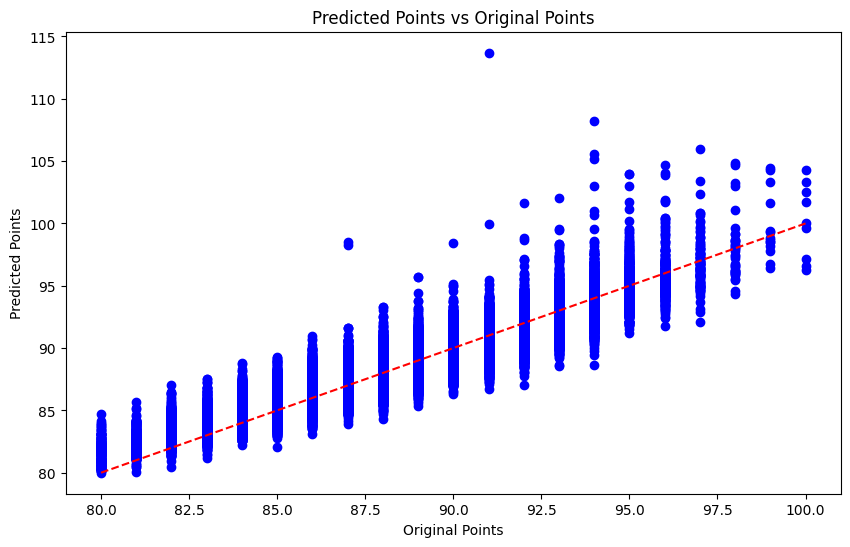

In [137]:
import matplotlib.pyplot as plt

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.scatter(comparison['Original Points'], comparison['Predicted Points'], color='blue')
plt.plot([min(comparison['Original Points']), max(comparison['Original Points'])], 
         [min(comparison['Original Points']), max(comparison['Original Points'])], 
         color='red', linestyle='--')
plt.xlabel('Original Points')
plt.ylabel('Predicted Points')
plt.title('Predicted Points vs Original Points')
plt.show()

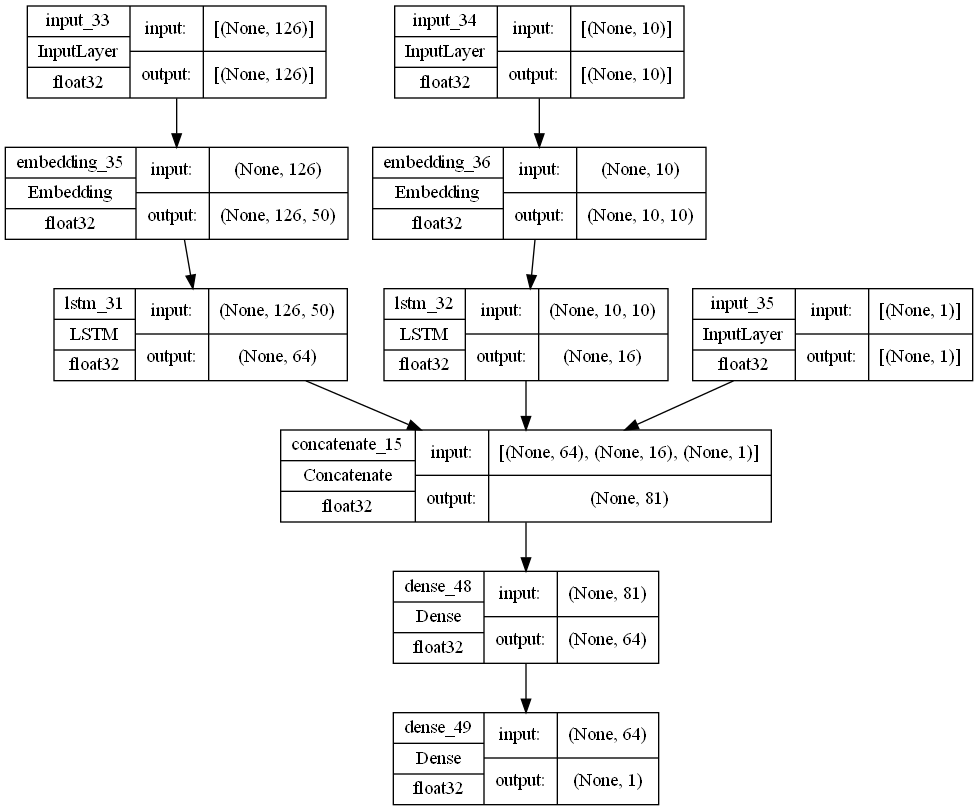

In [131]:
plot_model(model, show_dtype=True, show_shapes=True, show_layer_names=True, to_file='model_1.png')

In [10]:
wine_reviews11= wine_reviews1.drop_duplicates()

wine_reviews11.shape

(79487, 9)

In [12]:
wine_reviews11=wine_reviews1.dropna()
wine_reviews11.shape

(69919, 9)

In [13]:
wine_reviews11.head(5)

,country,description,designation,points,price,province,taster_name,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Roger Voss,Portuguese Red,Quinta dos Avidagos
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Alexander Peartree,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Paul Gregutt,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Michael Schachner,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Kerin O’Keefe,Frappato,Terre di Giurfo


In [ ]:
taster_name

In [27]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

data = wine_reviews11

df = data[['description', 'taster_name', 'points']]
df = df.dropna()

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

tokenizer_desc = Tokenizer()
tokenizer_desc.fit_on_texts(train_df['description'])
train_sequences_desc = tokenizer_desc.texts_to_sequences(train_df['description'])
test_sequences_desc = tokenizer_desc.texts_to_sequences(test_df['description'])

tokenizer_taster_name = Tokenizer()
tokenizer_taster_name.fit_on_texts(train_df['taster_name'])
train_sequences_taster_name = tokenizer_taster_name.texts_to_sequences(train_df['taster_name'])
test_sequences_taster_name= tokenizer_taster_name.texts_to_sequences(test_df['taster_name'])


max_len_desc = 100  
max_len_taster_name = 20  
train_data_desc = pad_sequences(train_sequences_desc, maxlen=max_len_desc)
test_data_desc = pad_sequences(test_sequences_desc, maxlen=max_len_desc)

train_data_taster_name = pad_sequences(train_sequences_taster_name, maxlen=max_len_taster_name)
test_data_taster_name = pad_sequences(test_sequences_taster_name, maxlen=max_len_taster_name)
# Scale the points column to a range of 0-1
max_points = df['points'].max()
train_labels = train_df['points'] / max_points
test_labels = test_df['points'] / max_points


input_desc = tf.keras.Input(shape=(max_len_desc,))
embedding_desc = tf.keras.layers.Embedding(len(tokenizer_desc.word_index) + 1, 50)(input_desc)
lstm_desc = tf.keras.layers.LSTM(64)(embedding_desc)

input_taster_name = tf.keras.Input(shape=(max_len_taster_name,))
embedding_taster_name = tf.keras.layers.Embedding(len(tokenizer_taster_name.word_index) + 1, 10)(input_taster_name)
lstm_taster_name = tf.keras.layers.LSTM(16)(embedding_taster_name)

concat = tf.keras.layers.Concatenate()([lstm_desc, lstm_taster_name])
dense1 = tf.keras.layers.Dense(64, activation='relu')(concat)
output = tf.keras.layers.Dense(1, activation='linear')(dense1)

model = tf.keras.Model(inputs=[input_desc, input_taster_name], outputs=output)

In [22]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit([train_data_desc, train_data_taster_name], train_labels, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
1399/1399 [==============================] - 46s 31ms/step - loss: 0.0068 - val_loss: 3.1822e-04
Epoch 2/10
1399/1399 [==============================] - 42s 30ms/step - loss: 2.9196e-04 - val_loss: 3.0536e-04
Epoch 3/10
1399/1399 [==============================] - 42s 30ms/step - loss: 2.5581e-04 - val_loss: 4.6148e-04
Epoch 4/10
1399/1399 [==============================] - 43s 31ms/step - loss: 2.2555e-04 - val_loss: 3.1850e-04
Epoch 5/10
1399/1399 [==============================] - 45s 32ms/step - loss: 2.1401e-04 - val_loss: 2.9851e-04
Epoch 6/10
1399/1399 [==============================] - 45s 32ms/step - loss: 1.8128e-04 - val_loss: 3.1417e-04
Epoch 7/10
1399/1399 [==============================] - 44s 32ms/step - loss: 1.7458e-04 - val_loss: 3.0119e-04
Epoch 8/10
1399/1399 [==============================] - 45s 32ms/step - loss: 1.5490e-04 - val_loss: 2.8434e-04
Epoch 9/10
1399/1399 [==============================] - 44s 32ms/step - loss: 1.3816e-04 - val_loss: 3.0108e

437/437 [==============================] - 4s 9ms/step


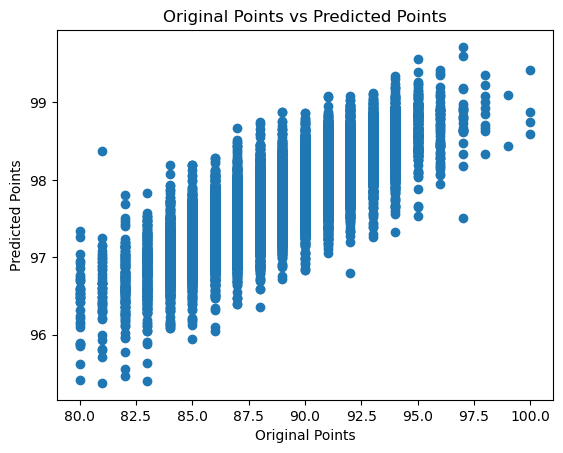

In [23]:
import matplotlib.pyplot as plt


original_points_range = (df['points'].min(), df['points'].max())
predicted_points_range = (train_labels.min() * max_points, train_labels.max() * max_points)


predicted_labels = model.predict([test_data_desc, test_data_taster_name]) * (original_points_range[1] - original_points_range[0]) + original_points_range[0]


plt.scatter(test_df['points'], predicted_labels)
plt.xlabel('Original Points')
plt.ylabel('Predicted Points')
plt.title('Original Points vs Predicted Points')
plt.show()

In [24]:
import numpy as np


predictions = model.predict([test_data_desc, test_data_taster_name])

predicted_points = predictions * max_points

comparison_table = pd.DataFrame({'Original Points': test_df['points'], 'Predicted Points': np.squeeze(predicted_points)})

print(comparison_table)

437/437 [==============================] - 4s 8ms/step
       Original Points  Predicted Points
75907               91         90.051353
53832               84         86.334518
3814                88         86.721245
56984               91         93.322548
11971               85         86.064163
...                ...               ...
1438                92         90.022919
84969               86         85.452019
85759               90         89.905441
91852               95         93.374100
62780               93         92.858162

[13984 rows x 2 columns]


In [25]:
from sklearn.metrics import mean_absolute_error

# Calculate the mean absolute error
mae = mean_absolute_error(test_df['points'], np.squeeze(predicted_points))

# Display the mean absolute error
print("Mean Absolute Error:", mae)

Mean Absolute Error: 1.3254042200965794


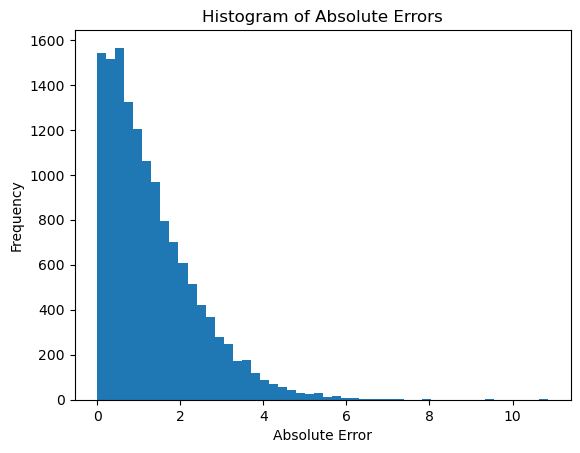

In [26]:
import matplotlib.pyplot as plt

# Calculate the absolute errors
absolute_errors = np.abs(test_df['points'] - np.squeeze(predicted_points))

# Plot the histogram of absolute errors
plt.hist(absolute_errors, bins=50)
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.title('Histogram of Absolute Errors')
plt.show()

In [29]:
wine_reviews11.sample(3)


,country,description,designation,points,price,province,taster_name,variety,winery
127098,US,"This is a classically light rosé, fragrant in ...",Rosé of,92,20.0,California,Virginie Boone,Pinot Noir,Lynmar
59743,Italy,"Aromas of toasted oak, vanilla and a confectio...",Mongris Riserva,88,30.0,Northeastern Italy,Kerin O’Keefe,Pinot Grigio,Marco Felluga
51966,US,The winery holds back its wines to good effect...,Three Sleeps Vineyard Sketches of Spain,93,28.0,Oregon,Paul Gregutt,Tempranillo,Dominio IV


In [31]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

data = wine_reviews11
df = data[['description', 'designation', 'points']]
df = df.dropna()

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

tokenizer_desc = Tokenizer()
tokenizer_desc.fit_on_texts(train_df['description'])
train_sequences_desc = tokenizer_desc.texts_to_sequences(train_df['description'])
test_sequences_desc = tokenizer_desc.texts_to_sequences(test_df['description'])

tokenizer_designation = Tokenizer()
tokenizer_designation.fit_on_texts(train_df['designation'])
train_sequences_designation = tokenizer_designation.texts_to_sequences(train_df['designation'])
test_sequences_designation = tokenizer_designation.texts_to_sequences(test_df['designation'])

max_len_desc = 100  # Set the maximum length for description
max_len_designation = 20  # Set the maximum length for winery
train_data_desc = pad_sequences(train_sequences_desc, maxlen=max_len_desc)
test_data_desc = pad_sequences(test_sequences_desc, maxlen=max_len_desc)

train_data_designation = pad_sequences(train_sequences_designation, maxlen=max_len_designation)
test_data_designation = pad_sequences(test_sequences_designation, maxlen=max_len_designation)
max_points = df['points'].max()
train_labels = train_df['points'] / max_points
test_labels = test_df['points'] / max_points

input_desc = tf.keras.Input(shape=(max_len_desc,))
embedding_desc = tf.keras.layers.Embedding(len(tokenizer_desc.word_index) + 1, 50)(input_desc)
lstm_desc = tf.keras.layers.LSTM(64)(embedding_desc)

input_designation = tf.keras.Input(shape=(max_len_designation,))
embedding_designation = tf.keras.layers.Embedding(len(tokenizer_designation.word_index) + 1, 10)(input_designation)
lstm_designation = tf.keras.layers.LSTM(16)(embedding_designation)

concat = tf.keras.layers.Concatenate()([lstm_desc, lstm_designation])
dense1 = tf.keras.layers.Dense(64, activation='relu')(concat)
output = tf.keras.layers.Dense(1, activation='linear')(dense1)

model = tf.keras.Model(inputs=[input_desc, input_designation], outputs=output)


In [32]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit([train_data_desc, train_data_designation], train_labels, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
1399/1399 [==============================] - 47s 31ms/step - loss: 0.0061 - val_loss: 3.1639e-04
Epoch 2/10
1399/1399 [==============================] - 43s 31ms/step - loss: 2.5132e-04 - val_loss: 3.1423e-04
Epoch 3/10
1399/1399 [==============================] - 44s 31ms/step - loss: 2.0632e-04 - val_loss: 3.0127e-04
Epoch 4/10
1399/1399 [==============================] - 45s 32ms/step - loss: 1.7553e-04 - val_loss: 2.8259e-04
Epoch 5/10
1399/1399 [==============================] - 46s 33ms/step - loss: 1.5945e-04 - val_loss: 3.4932e-04
Epoch 6/10
1399/1399 [==============================] - 45s 32ms/step - loss: 1.3587e-04 - val_loss: 2.8873e-04
Epoch 7/10
1399/1399 [==============================] - 46s 33ms/step - loss: 1.2234e-04 - val_loss: 3.0484e-04
Epoch 8/10
1399/1399 [==============================] - 46s 33ms/step - loss: 1.0637e-04 - val_loss: 3.6427e-04
Epoch 9/10
1399/1399 [==============================] - 47s 33ms/step - loss: 9.4495e-05 - val_loss: 2.8947e

437/437 [==============================] - 4s 8ms/step


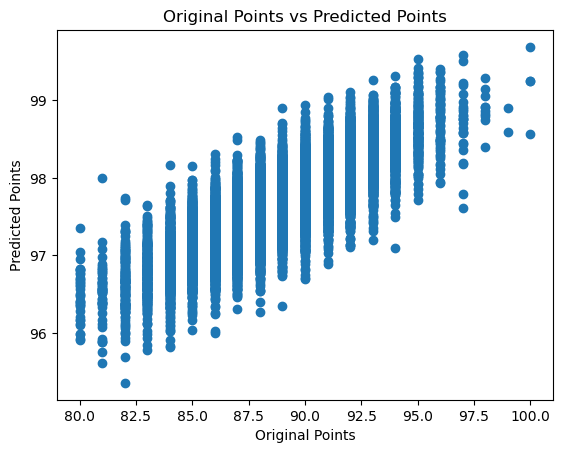

In [33]:
import matplotlib.pyplot as plt

original_points_range = (df['points'].min(), df['points'].max())
predicted_points_range = (train_labels.min() * max_points, train_labels.max() * max_points)

predicted_labels = model.predict([test_data_desc, test_data_designation]) * (original_points_range[1] - original_points_range[0]) + original_points_range[0]

plt.scatter(test_df['points'], predicted_labels)
plt.xlabel('Original Points')
plt.ylabel('Predicted Points')
plt.title('Original Points vs Predicted Points')
plt.show()

In [35]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test_df['points'], np.squeeze(predicted_points))

print("Mean Absolute Error:", mae)

Mean Absolute Error: 1.3254042200965794


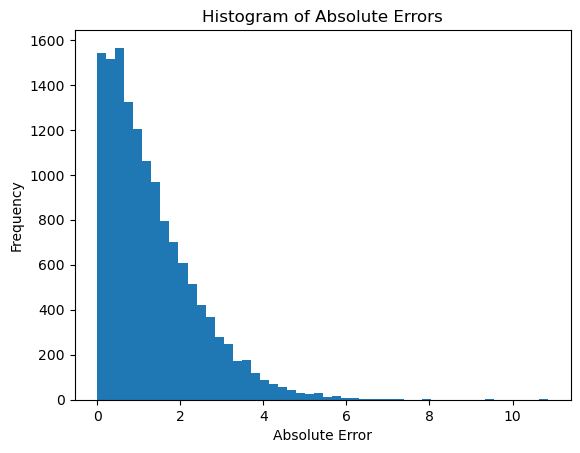

In [37]:
import matplotlib.pyplot as plt

absolute_errors = np.abs(test_df['points'] - np.squeeze(predicted_points))


plt.hist(absolute_errors, bins=50)
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.title('Histogram of Absolute Errors')
plt.show()